In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
os.chdir('..')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/p22g5/AnomaliesRecycling


In [2]:
from __future__ import print_function, division

import torch

from torchvision import models, transforms
import matplotlib.pyplot as plt

from src.transfer_learning import TransferLearningTrainer

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
transferLearningTrainer = TransferLearningTrainer(data_transforms=data_transforms)

In [4]:
model_name = "ResNet18_test_weights.pth"
model_ft = models.resnet18()
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 6, since we have 6 classes
model_ft.fc = torch.nn.Linear(num_ftrs, len(transferLearningTrainer.class_names))
model_ft.load_state_dict(torch.load(transferLearningTrainer.MODELS_DIR + model_name))

<All keys matched successfully>

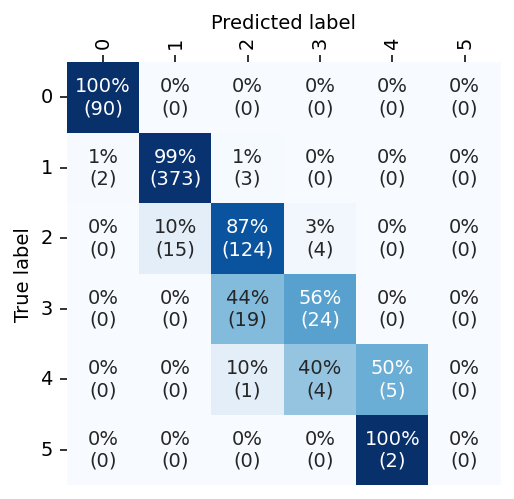

In [5]:
transferLearningTrainer.print_confusion_matrix(model_ft)

In [6]:
missclassified_images = transferLearningTrainer.print_misclassified(model_ft, plot=False)

cluttered/Anlerndaten (460).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (154).jpg
must be 5, but predicted 4
harder_samples/Anlernbilder (338).jpg
must be 3, but predicted 2
cluttered/Anlerndaten (875).jpg
must be 2, but predicted 1
cluttered/Anlerndaten (161).jpg
must be 2, but predicted 1
harder_samples/Anlernbilder (171).jpg
must be 3, but predicted 2
cluttered/Anlerndaten (764).jpg
must be 1, but predicted 0
harder_samples/Anlernbilder (61).jpg
must be 1, but predicted 2
cluttered/Anlerndaten (615).jpg
must be 2, but predicted 1
cluttered/Anlerndaten (465).jpg
must be 3, but predicted 2
cluttered/Anlerndaten (819).jpg
must be 1, but predicted 2
harder_samples/Anlernbilder (193).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (149).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (362).jpg
must be 4, but predicted 2
harder_samples/Anlernbilder (88).jpg
must be 3, but predicted 2
harder_samples/Anlernbilder (109).jpg
must be 3, but predicted 2
clut

In [7]:
df_test = pd.read_csv('/home/p22g5/AnomaliesRecycling/data/test.csv')
df_test['pred'] = df_test.apply(lambda row: missclassified_images[row['name']][1] if row['name'] in missclassified_images else row['count'], axis=1)
df_test_miss = df_test[df_test['name'].isin(missclassified_images)].copy()
df_test_miss

,name,count,edge,different colors,one color,transparent,inside,overlapping,dark color,open lid,pred
20,cluttered/Anlerndaten (460).jpg,3,0,1,0,0,0,1,0,0,2
27,harder_samples/Anlernbilder (154).jpg,5,0,1,0,0,0,1,0,0,4
40,harder_samples/Anlernbilder (338).jpg,3,0,1,0,0,0,1,1,0,2
43,cluttered/Anlerndaten (875).jpg,2,0,1,0,0,0,1,1,0,1
46,cluttered/Anlerndaten (161).jpg,2,0,1,0,0,0,1,1,0,1
50,harder_samples/Anlernbilder (171).jpg,3,0,1,0,1,1,1,0,0,2
58,cluttered/Anlerndaten (764).jpg,1,0,0,0,0,0,0,1,0,0
68,harder_samples/Anlernbilder (61).jpg,1,0,0,0,0,0,0,0,0,2
72,cluttered/Anlerndaten (615).jpg,2,0,0,1,0,0,1,0,0,1
79,cluttered/Anlerndaten (465).jpg,3,0,1,0,0,0,1,1,0,2


In [26]:
columns = ['edge', 'different colors', 'one color', 'transparent', 'inside', 'overlapping', 'dark color',
           'open lid']

def get_table(count, pred):
    def get_tags(row):
        tags = '-'
        for col in columns:
            if row[col] == 1:
                if tags != '-':
                    tags += ', '
                    tags += col
                else:
                    tags = col
        return tags
    df = df_test[(df_test['count'] == count) & (df_test['pred'] == pred)][columns].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    if len(df.index) == 0:
        return
    df = df.to_frame().reset_index()
    df['tags'] = df.apply(lambda row: get_tags(row), axis=1)
    df = df.drop(columns=columns).rename(columns={0: 'images'})
    display(HTML(df.to_html()))

In [59]:
def bar_plot(ax, data, preds, colors=None, total_width=0.8, single_width=1, legend=True, count=0):
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_xticks(range(len(preds)))
    ax.set_xticklabels(preds)
    ax.set_xlabel('Predicted label')
    ax.set_title(f'Label: {count}')
    ax.grid(False)
    
def get_obj(count):
    obj = dict.fromkeys(columns, [])
    preds = []
    for pred in range(6):
        df_pred = df_test[(df_test['count'] == count) & (df_test['pred'] == pred)]
        df = df_pred[columns].sum().to_frame()
        if df.sum().tolist()[0] == 0:
            continue
        df[0] = df[0].apply(lambda x: 100 * x/len(df_pred.index))
        df = df.reset_index()
        df_dict = df.to_dict('records')
        for row in df_dict:
            obj[row['index']] = obj[row['index']] + [row[0]]
        preds.append(pred)
    
    fig, ax = plt.subplots(dpi=140)
    bar_plot(ax, obj, preds, total_width=.8, single_width=.9, count=count)
    fig.tight_layout()
    plt.show()

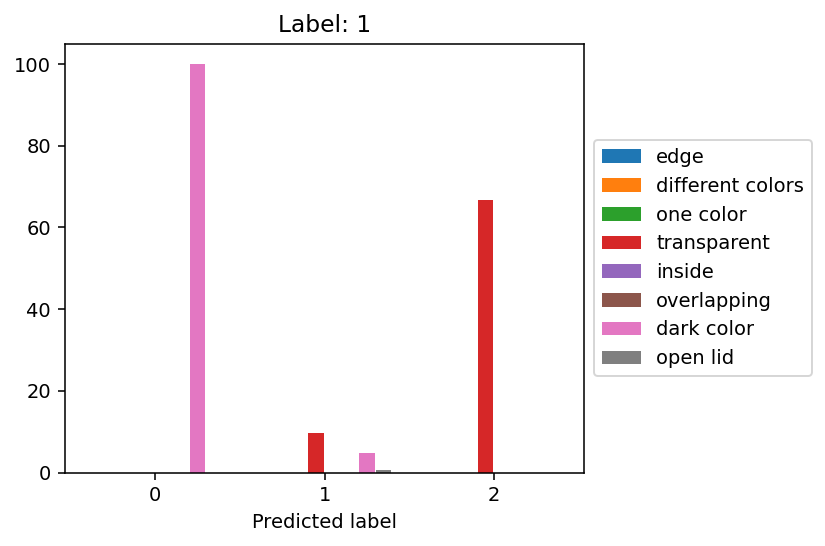

In [60]:
get_obj(count=1)

In [65]:
get_table(count=5, pred=4)

,images,tags
0,50.0%,"different colors, overlapping"
1,50.0%,"different colors, transparent, inside, overlapping"
